# Números Complejos

El uso de números complejos puede no ser familiar para muchos de Uds. en
Geociencias, pero en el tratamiento de datos y series de tiempo, se usa para el análisis de Fourier, en geofísica también es muy utilizado.

En algunos lenguajes, el uso de números complejos no es sencillo. En Fortran por ejemplo, un número complejo es estandar, mientras que en C/C++ no lo es y se requiere cargar librerías para poder trabajar con ellos. En Python se puede definir un número complejo usando
```
z = complex(2,3)
```
o también
```
z = 2+3j
```
donde `j` se usa en vez de `i` en Matlab.

Un programa con algunos ejemplos básicos del uso de números complejos:

In [1]:
# basic_complex.py
# Some basic complex number concepts

import cmath

z0 = 1j
z1 = 1j * 1j

print(z0)
print(z1)

z0 =  complex(2,3)
z  = 2+3j
print(z, z0)

print(z.real)
print(z.imag)
print(z.conjugate())

z = complex(3,4)
print(z, abs(z))
print(pow(z, 2))

# Some function on complex
print("Functions on complex numbers")
z = complex(2,3)
zsin = cmath.sin(z)
zcos = cmath.cos(z)

print('For z = ', z)
print('cos(z), sin(z)', zcos, zsin)


1j
(-1+0j)
(2+3j) (2+3j)
2.0
3.0
(2-3j)
(3+4j) 5.0
(-7+24j)
Functions on complex numbers
For z =  (2+3j)
cos(z), sin(z) (-4.189625690968807-9.109227893755337j) (9.15449914691143-4.168906959966565j)


# Algunos ejemplos de números complejos

Acá otro programa con interacción del usuario para multiplicar dos números complejos

In [4]:
# testcomplex.py

import cmath

zreal,zimag = input("Enter first  complex number ").split()
a = complex(float(zreal),float(zimag))

zreal,zimag = input("Enter second complex number ").split()
b = complex(float(zreal),float(zimag))

c = a*b

print('Product         = ', c)
print('abs of product  = ', abs(c))
print('sqrt of product = ', cmath.sqrt(c))



Enter first  complex number 2 3 
Enter second complex number 5 3
Product         =  (1+21j)
abs of product  =  21.02379604162864
sqrt of product =  (3.3184179997122603+3.164158343195599j)


Los números complejos en Python se representan como dos pares de números en parentesis, el segundo con una j. Por esto, no es fácil pedir el input del usuario.

Se solicita dos números y el programa los lee y los pone dentro de un número complejo. Cualquiera de los siguientes casos
```
1, 1
(1, 1j)
1+1j
```
producirían errores en nuestro programa

Python proporciona las funciones para unir dos n??meros dentro de un complejo, o extraer la parte real e imaginarias de un número complejo.

In [5]:
# testcomplex2.py

import cmath

zreal = input("Enter real part ")
zimag = input("Enter imaginary part ")

a = complex(float(zreal),float(zimag))
print ('z = ', a)

a = cmath.exp(a)
print ('exp(a) = ', a)

print ('Real and Imaginary parts ', a.real, a.imag)


Enter real part 3
Enter imaginary part 2
z =  (3+2j)
exp(a) =  (-8.358532650935372+18.263727040666765j)
Real and Imaginary parts  -8.358532650935372 18.263727040666765


# Arreglos de números complejos

`NumPy` tiene la capacidad de trabajar con arreglos de números complejos, lo cual puede ser de gran utilidad. Incluso las operaciones en numpy trabajan sin problema (o por lo menos la parte que he mirado) con arreglos complejos.

Abajo un ejemplo simple de creeación de un arreglo complejo, y el uso de
multiplicación matricial `matmul()` con arreglos complejos.


In [6]:
# array_complex.py

import cmath
import numpy as np

a = np.array([1+2j, 3+4j, 5+6j])

print('Complex array ', a.shape)
print(a)

print ('Imag part ', a.imag)
a.imag = np.array([8, 10, 12])

print('New array ', a)

a = np.array([1+2j, 3+4j, 5+6j])
a = a[:, np.newaxis]
b = a.T

print('Array a, (3,1) ', a)
print('Array b, (1,3) ', b)

c = np.matmul(a,b)

print ('matmul(a*a.T)')
print(c)

c = np.matmul(a,np.conjugate(b))

print ('matmul(a*conj(a.T))')
print(c)


Complex array  (3,)
[1.+2.j 3.+4.j 5.+6.j]
Imag part  [2. 4. 6.]
New array  [1. +8.j 3.+10.j 5.+12.j]
Array a, (3,1)  [[1.+2.j]
 [3.+4.j]
 [5.+6.j]]
Array b, (1,3)  [[1.+2.j 3.+4.j 5.+6.j]]
matmul(a*a.T)
[[ -3. +4.j  -5.+10.j  -7.+16.j]
 [ -5.+10.j  -7.+24.j  -9.+38.j]
 [ -7.+16.j  -9.+38.j -11.+60.j]]
matmul(a*conj(a.T))
[[ 5.+0.j 11.+2.j 17.+4.j]
 [11.-2.j 25.+0.j 39.+2.j]
 [17.-4.j 39.-2.j 61.+0.j]]


# Fractales

Si no lo han visto, en internet se encuentran figuras muy llamativas de fractales. Uno de los sets mas famosos son el Mandelbrot Set, el cual es relativamente fácil de generar en un programa de computador. Para hacerlo, se requiere poder manejar números complejos en Python.

La idea básica detrás del cálculo de fractales es que hay ciertas funciones complejas que, cuando se calculan repetidamente, pueden divergir o estar limitadas. El que divergan o no, es muy sensible a pequeños cambios en el valor del número complejo que inicia el cálculo. Esto se observa muy cerca de ciertas
regiones en el plano complejo.

Una de las imagenes más famosas de fratales es el Mandelbrot Set. Para
generar este set, empezamos considerando un númerp complejo c, al cual se le aplica el siguiente algoritmo:
```
set z=0 to start
then repeateadly compute z = z*z + c
until |z| > 2 OR the number of iterations exceeds some number
output the number of iterations
```

Por ejemplo, si c = 0.3 + 0.3i, entonces:
```
1ra iter: z = 0.30 + 0.30i |z| = 0.42
2da iter: z = 0.30 + 0.48i |z| = 0.57
3ra iter: z = 0.16 + 0.59i |z| = 0.61
4ta iter: z = -0.02 + 0.49i |z| = 0.49
```
En este caso, z permanecerá limitado aún hasta después de miles de iteraciones.

Sin embargo, para c = 0.5 + 1.0i:
```
1ra iter: z = 0.50 + 1.00i |z| = 1.10
2da iter: z = -0.25 + 2.00i |z| = 2.00
3ra iter: z = -3.44 + 0.00i |z| = 3.40
4ta iter: z = 12.32 + 1.00i |z| = 12.4
5ta iter: z = 151.1 +25.63i |z| = 153.4
```
y el valor de z rápidamente explota a valores infinitos. En la iteración 10 el valor
seguramente ya excederá la capacidad para que un computador pueda guardar
el número en memoria. Sin embargo, podemos evitar hacer estos cálculos de z
una vez su valor absoluto exceda 2.0, ya que se puede demostrar que una vez
ese valor es alcanzado, `z` tiende a diverger.

El cálculo se realiza para una serie de valores de `c` y el resultado se grafica como función de la posición de `c` en el plano complejo (la parte real en el eje `x` la parte imaginaria en el eje `y` y el número de iteraciones como valor de amplitud).

El Mandelbrot set, es el set de números complejos c para los cuales el tamaño de `z^2 +c` es finito aun después de un número infinito de iteraciones. Una buena aproximación, es por ejemplo realizar esta operación hasta un número grande de iteraciones (1000 puede ser un buen ejemplo), y asumir que si `|z| > 2`, el
valor va a diverger.

Un código para calcular el Mandelbrot set se muestra a continuación, donde se define de manera automática el número de puntos para el eje `x` y el eje `y` (eje de los reales e imaginarios).

Enter x1,x2,y1,y2 -2 2 -2 2


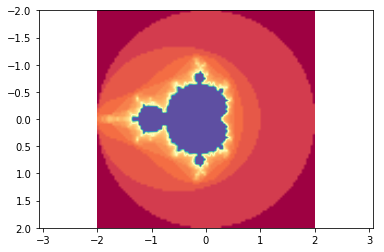

In [16]:
# mandel1.py
# Plot the mandelbrot set for a number of points
#

import cmath
import numpy as np
import matplotlib.pyplot as plt

x1,x2,y1,y2 = input("Enter x1,x2,y1,y2 ").split()
x1 = float(x1)
x2 = float(x2)
y1 = float(y1)
y2 = float(y2)

# Define grid size and start matrix
nx = 100
ny = 100
dx = (x2-x1)/float(nx)
dy = (y2-y1)/float(ny)
dat = np.zeros((nx,ny))

# Main loop for each value
for ix in range(nx):
   for iy in range(ny):
      cr = x1 + dx/2. + dx*float(ix)
      ci = y1 + dy/2. + dy*float(iy)
      # Create complex number
      c = complex(cr,ci)
      z = complex(0.0, 0.0)
      for it in range(1000):
         z = c + z*z
         if (abs(z) > 2):
            break
      dat[ix,iy] = it+1

# Rotate matrix and plot log10 scale
dat = np.transpose(dat)
zdat = np.log10(dat)

# Plot result 
plt.imshow(zdat,interpolation='bilinear',extent=(x1,x2,y2,y1),cmap='Spectral')
plt.axis('equal')
plt.savefig('mandel1.png')
plt.show()       

